In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
import librosa as lr
from librosa import display

In [3]:
audio, sample_rate = lr.load('../midi2audio/Bach, Carl Philipp Emanuel, La Capricieuse, H.113, QcC7KiHOg7w.wav')

time = np.arange(0, len(audio)) / sample_rate

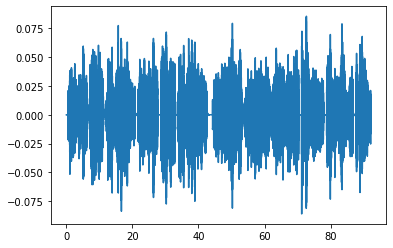

In [4]:
plt.plot(time, audio)

In [5]:
audio_transformed = np.abs(lr.stft(audio))
audio_transformed

array([[2.6452744e-02, 2.8790908e-02, 3.1189540e-02, ..., 6.2665656e-02,
        1.1436564e-01, 1.6120513e-01],
       [1.1059189e-02, 1.5570118e-02, 1.5680278e-02, ..., 5.9760086e-02,
        4.7502935e-02, 1.1968394e-01],
       [3.9109956e-03, 2.0406067e-03, 5.8988237e-05, ..., 3.6769640e-02,
        7.3373586e-02, 1.4518867e-01],
       ...,
       [1.9242743e-05, 9.6206613e-06, 8.1198487e-10, ..., 7.1125976e-07,
        2.2218189e-04, 9.1070851e-04],
       [1.9240415e-05, 9.6200301e-06, 3.9448250e-10, ..., 2.9962888e-07,
        2.2169523e-04, 9.1015041e-04],
       [1.9240137e-05, 9.6201056e-06, 3.7533122e-11, ..., 1.2587127e-09,
        2.2203611e-04, 9.1017946e-04]], dtype=float32)

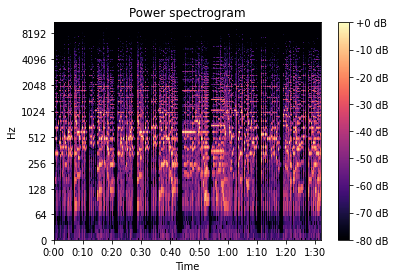

In [6]:
fig, ax = plt.subplots()
img = display.specshow(lr.amplitude_to_db(audio_transformed,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [7]:
new_audio = lr.istft(audio_transformed)

In [11]:
print(len(audio), len(new_audio), sample_rate)

2030784 2030592 22050


In [ ]:
sf.write('processed-output.wav', new_audio, sample_rate)